## Pivot and Pivot table
----------
### Pivot :
     Pivot allows you reshape or trandform your dataset.
 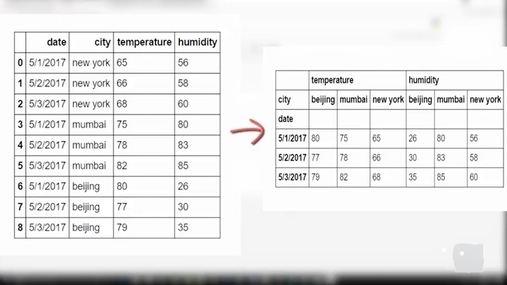
    

         In the city column there are three different cities new york, mumbai and beijing.Every city hase temperature
    and humidity in three different months.If you want to transform you dataset into another shape table so that you
    you can better analyse data,here comes the use of pivot.

In [2]:
import pandas as pd

In [3]:
mydis={
    'Date':['5/1/2017','5/2/2017','5/3/2017','5/1/2017','5/2/2017','5/3/2017','5/1/2017','5/2/2017','5/3/2017'],
    'city':['new york','new york','new york','mumbai','mumbai','mumbai','beijing','beijing','beijing'],
    'temp':[65,66,68,75,78,82,80,77,79],
'humidity':[56,58,60,80,83,85,26,30,35]
}
df=pd.DataFrame(mydis)
df

,Date,city,humidity,temp
0,5/1/2017,new york,56,65
1,5/2/2017,new york,58,66
2,5/3/2017,new york,60,68
3,5/1/2017,mumbai,80,75
4,5/2/2017,mumbai,83,78
5,5/3/2017,mumbai,85,82
6,5/1/2017,beijing,26,80
7,5/2/2017,beijing,30,77
8,5/3/2017,beijing,35,79


           To reshape your dataframe into another form you need to pass you arguments one is index="row" ("row" is the row
    which you want to be row of tranformed dataframe) and another argument is column="col" ("col" is the column you want
    to be the column of the transformed dataframe). See the example for better understanding.

In [4]:
df.pivot(index='Date',columns='city')

humidity                    temp                
city      beijing mumbai new york beijing mumbai new york
Date                                                     
5/1/2017       26     80       56      80     75       65
5/2/2017       30     83       58      77     78       66
5/3/2017       35     85       60      79     82       68

In [7]:
df.pivot(index='city',columns='Date')

humidity                       temp                  
Date     5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017
city                                                          
beijing        26       30       35       80       77       79
mumbai         80       83       85       75       78       82
new york       56       58       60       65       66       68

### 2) Pivot Table
         Pivot table is used to summarize and aggregate data inside dataframe.

In [6]:
mydis={
    'Date':['5/1/2017','5/1/2017','5/2/2017','5/2/2017','5/1/2017','5/1/2017','5/2/2017','5/2/2017','5/1/2017',
            '5/1/2017','5/2/2017','5/2/2017'],
    'city':['new york','new york','new york','new york','mumbai','mumbai','mumbai','mumbai','beijing','beijing',
            'beijing','beijing'],
    'temp':[65,66,68,69,75,78,82,81,80,77,79,86],
'humidity':[56,58,60,50,80,83,85,78,26,30,35,78]
}
df=pd.DataFrame(mydis)
df

,Date,city,humidity,temp
0,5/1/2017,new york,56,65
1,5/1/2017,new york,58,66
2,5/2/2017,new york,60,68
3,5/2/2017,new york,50,69
4,5/1/2017,mumbai,80,75
5,5/1/2017,mumbai,83,78
6,5/2/2017,mumbai,85,82
7,5/2/2017,mumbai,78,81
8,5/1/2017,beijing,26,80
9,5/1/2017,beijing,30,77


In [18]:
import numpy as np
d=pd.pivot_table(df,index='Date',columns='city',aggfunc='count')
d

humidity                    temp                
city      beijing mumbai new york beijing mumbai new york
Date                                                     
5/1/2017        2      2        2       2      2        2
5/2/2017        2      2        2       2      2        2

In [19]:
d=pd.pivot_table(df,index='Date',columns='city',aggfunc='sum')
d

humidity                    temp                
city      beijing mumbai new york beijing mumbai new york
Date                                                     
5/1/2017       56    163      114     157    153      131
5/2/2017      113    163      110     165    163      137

In [20]:
d=pd.pivot_table(df,index='Date',columns='city',aggfunc='mean')
d

humidity                    temp                
city      beijing mumbai new york beijing mumbai new york
Date                                                     
5/1/2017     28.0   81.5     57.0    78.5   76.5     65.5
5/2/2017     56.5   81.5     55.0    82.5   81.5     68.5

In [22]:
d=pd.pivot_table(df,index='Date',columns='city',aggfunc='max')
d

humidity                    temp                
city      beijing mumbai new york beijing mumbai new york
Date                                                     
5/1/2017       30     83       58      80     78       66
5/2/2017       78     85       60      86     82       69

In [23]:
d=pd.pivot_table(df,index='Date',columns='city',aggfunc='min')
d

humidity                    temp                
city      beijing mumbai new york beijing mumbai new york
Date                                                     
5/1/2017       26     80       56      77     75       65
5/2/2017       35     78       50      79     81       68

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df

,Date,city,humidity,temp
0,2017-05-01,new york,56,65
1,2017-05-01,new york,58,66
2,2017-05-02,new york,60,68
3,2017-05-02,new york,50,69
4,2017-05-01,mumbai,80,75
5,2017-05-01,mumbai,83,78
6,2017-05-02,mumbai,85,82
7,2017-05-02,mumbai,78,81
8,2017-05-01,beijing,26,80
9,2017-05-01,beijing,30,77


In [8]:
df.pivot_table(index=pd.Grouper(freq='M',key='Date'),columns='city')

humidity                    temp                
city        beijing mumbai new york beijing mumbai new york
Date                                                       
2017-05-31    42.25   81.5     56.0    80.5   79.0     67.0